In [2]:
import os, random
from keras import layers,models,optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
    

# Data Sources
    
</div>

<div class="alert alert-block alert-success">

## Two datasources were used on this project
- <a href="https://www.kaggle.com/luisblanche/covidct">Kaggle COVID-19 Lung CT Scans</a> <br>
- <a href="https://data.mendeley.com/datasets/2fxz4px6d8/4">Augmented COVID-19 X-ray Images Dataset (Dataset All Augmented</a><br>

</div>

### </font> <font color='#3a7f8f'>Enviroment Preparation</font> 

<div class="alert alert-danger">Before run the next cells it's necessary to download and extract all the datasets on given folder <br/>
After that change the path bellow to the path of the folder where you extracted the datasets</div>

In [3]:
base_dir = "C:\\Users\\z0045zxy\\source\\novaims\\covid"

In [4]:
def create_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

In [5]:
covid_original_path = os.path.join(base_dir, 'CT_COVID')
no_covid_original_path = os.path.join(base_dir, 'CT_NonCOVID')

len_covid = int(len(os.listdir(covid_original_path)) * 70 / 100)
len_no_covid = int(len(os.listdir(no_covid_original_path)) * 70 / 100)

In [6]:
train_path =  os.path.join(base_dir, 'train')
create_dir(train_path)
validation_path = os.path.join(base_dir, 'validation')
create_dir(validation_path)

In [7]:
covid_train_path =  os.path.join(train_path, 'COVID')
create_dir(covid_train_path)
no_covid_train_path = os.path.join(train_path, 'NOCOVID')
create_dir(no_covid_train_path)

In [8]:
covid_val_path =  os.path.join(validation_path, 'COVID')
create_dir(covid_val_path)
no_covid_val_path = os.path.join(validation_path, 'NOCOVID')
create_dir(no_covid_val_path)

In [9]:
covid_list = os.listdir(covid_original_path)
no_covid_list = os.listdir(no_covid_original_path)

In [10]:
train_covid_list = random.sample(covid_list,len_covid)
train_no_covid_list = random.sample(no_covid_list,len_no_covid)

In [11]:
for file_name in train_covid_list:
    source = os.path.join(covid_original_path,file_name)
    target = os.path.join(covid_train_path,file_name)
    os.rename(source,target)

In [12]:
for file_name in train_no_covid_list:
    source = os.path.join(no_covid_original_path,file_name)
    target = os.path.join(no_covid_train_path,file_name)
    os.rename(source,target)

In [13]:
covid_list = os.listdir(covid_original_path)
no_covid_list = os.listdir(no_covid_original_path)

In [14]:
for file_name in covid_list:
    source = os.path.join(covid_original_path,file_name)
    target = os.path.join(covid_val_path,file_name)
    os.rename(source,target)

In [15]:
for file_name in no_covid_list:
    source = os.path.join(no_covid_original_path,file_name)
    target = os.path.join(no_covid_val_path,file_name)
    os.rename(source,target)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

In [17]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [18]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [19]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [20]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

In [21]:
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [25]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 1798 images belonging to 2 classes.


In [26]:
validation_generator = test_datagen.flow_from_directory(validation_path, target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 772 images belonging to 2 classes.


In [27]:
for data_batch,labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [28]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=90,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=39)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
90/90 [==============================] - 96s 1s/step - loss: 0.6955 - acc: 0.5003 - val_loss: 0.6712 - val_acc: 0.5829
Epoch 2/30
90/90 [==============================] - 74s 828ms/step - loss: 0.6769 - acc: 0.5858 - val_loss: 0.6661 - val_acc: 0.5712
Epoch 3/30
90/90 [==============================] - 72s 805ms/step - loss: 0.6644 - acc: 0.6127 - val_loss: 0.6409 - val_acc: 0.6205
Epoch 4/30
90/90 [==============================] - 71s 793ms/step - loss: 0.6551 - acc: 0.6101 - val_loss: 0.6372 - val_acc: 0.6606
Epoch 5/30
90/90 [==============================] - 72s 796ms/step - loss: 0.6290 - acc: 0.6615 - val_loss: 0.6225 - val_acc: 0.6412
Epoch 6/30
90/90 [==============================] - 71s 795ms/step - loss: 0.6219 - acc: 0.6595 - val_loss: 0.5880 - val_acc: 0.6554
Epoch 7/30
90/90 [==============================] - 69s 768ms/step - loss: 0.6192 - acc: 0.6590 - val_loss: 0.5761 - val_acc: 0.7163
Epoch 8/30
90/90 [==============================] - 71s 793ms/step - los

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [30]:
epochs = range(1,len(acc) + 1)

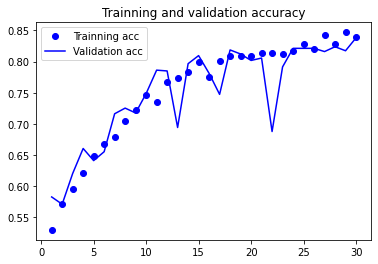

In [31]:
plt.plot(epochs,acc,'bo',label='Trainning acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Trainning and validation accuracy')
plt.legend()

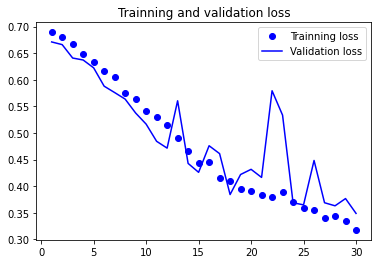

In [32]:
plt.figure()
plt.plot(epochs,loss, 'bo',label='Trainning loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Trainning and validation loss')
plt.legend()